# Movies Based on Genres

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#uploading cleaned data

In [21]:
gendf = pd.read_csv('quality3.csv')

In [22]:
gendf

,budget,original_language,popularity,revenue,runtime,status,vote_average,vote_count,genre1,Directors,actor_count,Prodcountries,Prodcompanies,release_year,profit,Quality
0,237000000,7,150.437577,2787965087,162.0,1,7.2,11800,0,876,83,68,640,2009,2550965087,1
1,300000000,7,139.082615,961000000,169.0,1,6.9,4500,1,760,34,67,1380,2007,661000000,1
2,245000000,7,107.376788,880674609,148.0,1,6.3,4466,0,1949,83,68,394,2015,635674609,0
3,250000000,7,112.312950,1084939099,165.0,1,7.6,9106,0,355,158,67,771,2012,834939099,1
4,260000000,7,43.926995,284139100,132.0,1,6.1,2124,0,93,27,68,1446,2012,24139100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4734,1000000,7,23.307949,424760,77.0,1,6.9,658,15,1995,19,68,936,2004,-575240,1
4735,1000000,8,14.269792,2040920,81.0,1,6.6,238,0,1875,7,68,268,1992,1040920,1
4736,1000000,7,0.642552,0,85.0,1,5.9,58,3,597,5,10,171,2011,-1000000,0
4737,1000000,7,1.444476,0,120.0,1,7.0,58,3,1973,7,67,1272,2013,-1000000,1


In [23]:
#checking null values

In [24]:
gendf.isnull().sum()

budget               0
original_language    0
popularity           0
revenue              0
runtime              0
status               0
vote_average         0
vote_count           0
genre1               0
Directors            0
actor_count          0
Prodcountries        0
Prodcompanies        0
release_year         0
profit               0
Quality              0
dtype: int64

In [26]:
gendf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4739 entries, 0 to 4738
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             4739 non-null   int64  
 1   original_language  4739 non-null   int64  
 2   popularity         4739 non-null   float64
 3   revenue            4739 non-null   int64  
 4   runtime            4739 non-null   float64
 5   status             4739 non-null   int64  
 6   vote_average       4739 non-null   float64
 7   vote_count         4739 non-null   int64  
 8   genre1             4739 non-null   int64  
 9   Directors          4739 non-null   int64  
 10  actor_count        4739 non-null   int64  
 11  Prodcountries      4739 non-null   int64  
 12  Prodcompanies      4739 non-null   int64  
 13  release_year       4739 non-null   int64  
 14  profit             4739 non-null   int64  
 15  Quality            4739 non-null   int64  
dtypes: float64(3), int64(13)

In [27]:
gendf['genre1'].value_counts()

genre1
6     1202
3     1038
0      753
1      339
11     298
4      195
17     194
2      122
8      117
14     105
15      96
5       71
7       53
13      41
12      34
19      27
10      25
18      24
16       4
9        1
Name: count, dtype: int64

In [28]:
gendf=gendf[(gendf['genre1']!=9)&(gendf['genre1']!=16)]

In [29]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# lda_model = LinearDiscriminantAnalysis()
# X_lda = lda_model.fit_transform(X, y)

In [30]:
# plt.xlabel('LDA1')
# plt.ylabel('LDA2')
# plt.scatter(X_lda[:,0],X_lda[:,1],c=y,cmap='rainbow',alpha=0.7,edgecolors='b')

In [31]:
# label encoding
from sklearn import preprocessing

In [ ]:
gendf

In [32]:
corr_mat = gendf.corr()

<Axes: >

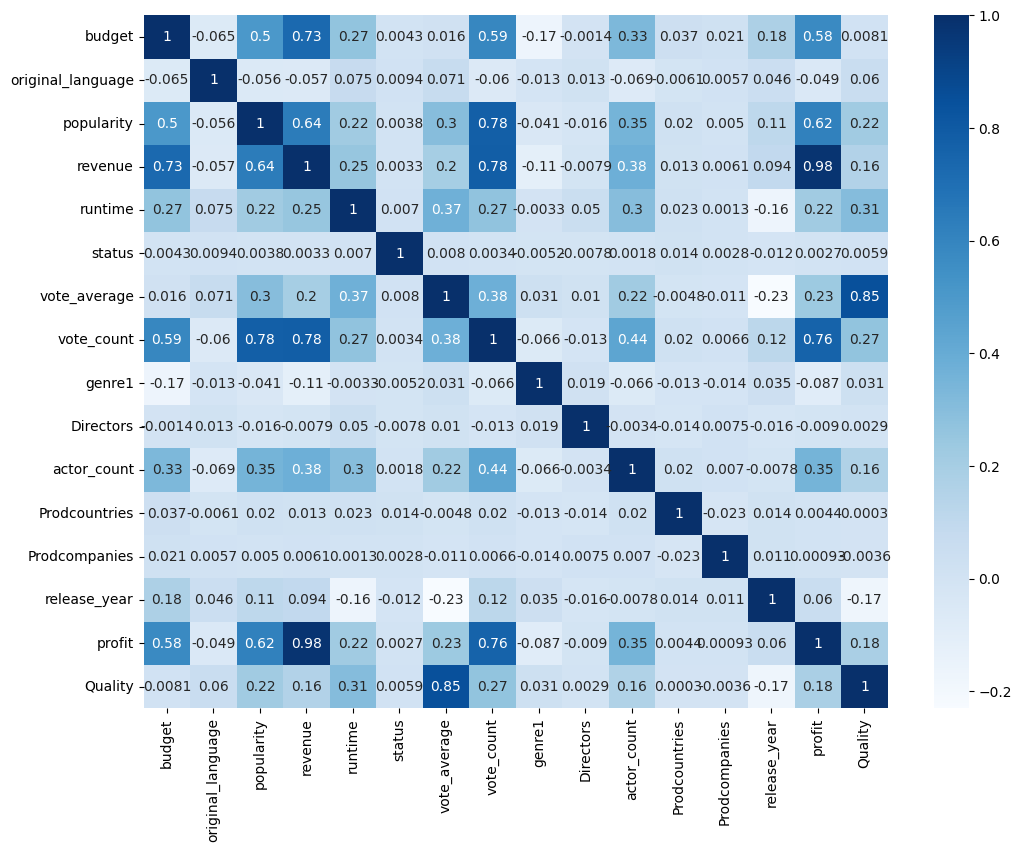

In [33]:
plt.figure(figsize=(12,9))
sns.heatmap(corr_mat,annot=True,cmap='Blues')

In [34]:
gendf.drop('status',axis=1,inplace=True)

In [35]:
# splitting

In [36]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler

In [37]:
x=gendf.drop(['genre1'],axis=1)
y=gendf['genre1']

In [38]:
#standard
scaled_x = StandardScaler().fit_transform(x)
scaled_x

array([[ 5.09360145, -0.15701233,  4.0273375 , ...,  0.53143973,
        18.24465889,  1.1075725 ],
       [ 6.64155639, -0.15701233,  3.67184794, ...,  0.37088351,
         4.4365406 ,  1.1075725 ],
       [ 5.29016715, -0.15701233,  2.67923429, ...,  1.01310838,
         4.25151284, -0.90287543],
       ...,
       [-0.7050869 , -0.15701233, -0.66229218, ...,  0.69199594,
        -0.40004309, -0.90287543],
       [-0.7050869 , -0.15701233, -0.63718636, ...,  0.85255216,
        -0.40004309,  1.1075725 ],
       [-0.7050869 , -0.15701233, -0.62198973, ...,  0.21032729,
        -0.40004309, -0.90287543]])

In [39]:
#balancing
from imblearn.over_sampling import SMOTE
os=SMOTE()
x1,y1 = os.fit_resample(scaled_x,y)

In [40]:
X_train, X_test,y_train, y_test=train_test_split(x1,y1,test_size=0.3,random_state=42)

In [41]:
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
# lda_model = LinearDiscriminantAnalysis()
# X_lda = lda_model.fit_transform(scaled_x, y)

In [42]:
# plt.xlabel('LDA1')
# plt.ylabel('LDA2')
# plt.scatter(
# X_lda[:,0],
# X_lda[:,1],
#    c=y,
# cmap='rainbow',
#    alpha=0.7,
# edgecolors='b'
# )

In [43]:
X_train.shape

(15145, 14)

In [44]:
X_test.shape

(6491, 14)

# Logistic Regression

In [45]:
#libraries for logistic and evaluation measures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score

In [46]:
#logistic model
log_model = LogisticRegression().fit(X_train,y_train)

In [47]:
y_pred=log_model.predict(X_test)

In [48]:
print("Train score:" ,log_model.score(X_train,y_train))

Train score: 0.2931660614064048


In [49]:
print('Test score :' ,log_model.score(X_test,y_test))

Test score : 0.29240486827915574


In [50]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 40  52   6  11  10  14   4  22  11   9  42  16  23   3  28  35  24  24]
 [ 37  80  29   3   1  13   3  34  12   8  20  18   3   0  23   7  12  39]
 [  0   5 205   2   0   6   0  65   8   8  30   8  13   3   8  11   0   4]
 [ 14   7  12  29  10  34  19  25   2  11  74  30  28   8   7  30   7  12]
 [  8  18   2   9  49  11  35   7   2  22  28  49  32  14   2  34  29  29]
 [  0   0   1   0   0 302  12   5   0   4  17   9  12   0   0  12   0   0]
 [  5  10   7   8  17  49  34   1   6  54  24  24  17   6   5  24  23  31]
 [  1  11  67  23   0  21   1  94   7   3  69  22   9   2  13   8   0  11]
 [ 35  40  37   6   9  13   4  35  20   4  33  24  29  13  31  18  11   9]
 [  2   0   0   0   6  21  38   0   0 179   3   3   2  10   4  17  22  45]
 [  8   2  18  10   9  21   0  13   4   5 148  10  31   2   8  40   0  19]
 [  9   4   6  20  19  52  14   7  14  15  10  52  12   9   1  52   6  65]
 [  7  21  20   4  12  34   0   8   2   0  59   7 104   2  18  33   8   6]
 [ 16  15   6  19  10  40

Text(0.5, 1.0, 'logistic')

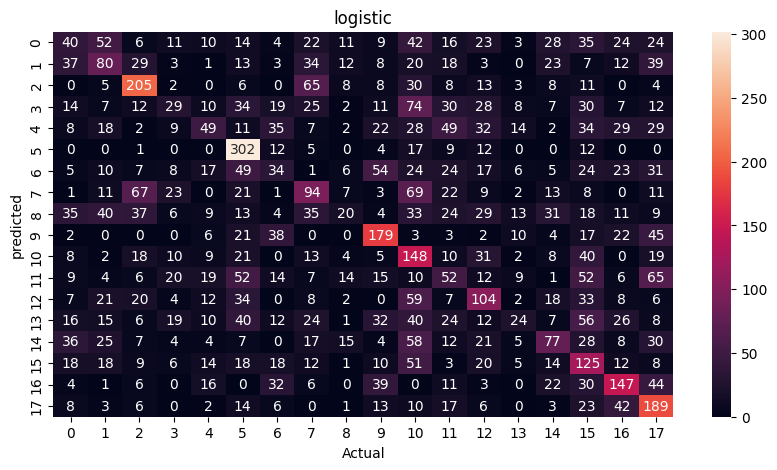

In [51]:
#plotting
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,fmt='d') # fmt formatting
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title('logistic')

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.16      0.11      0.13       374
           1       0.26      0.23      0.24       342
           2       0.46      0.55      0.50       376
           3       0.19      0.08      0.11       359
           4       0.26      0.13      0.17       380
           5       0.45      0.81      0.58       374
           6       0.15      0.10      0.12       345
           7       0.25      0.26      0.26       362
           8       0.19      0.05      0.08       371
          10       0.43      0.51      0.46       352
          11       0.21      0.43      0.28       348
          12       0.15      0.14      0.15       367
          13       0.28      0.30      0.29       345
          14       0.23      0.06      0.10       372
          15       0.28      0.22      0.24       358
          17       0.21      0.35      0.26       362
          18       0.39      0.41      0.40       361
          19       0.33    

In [53]:
print(precision_score(y_test,y_pred,average='macro'))

0.270659694059418


In [54]:
print(f1_score(y_test,y_pred,average='macro'))

0.26624249661666133


In [55]:
print(accuracy_score(y_test,y_pred))

0.29240486827915574


In [56]:
print(recall_score(y_test,y_pred,average='macro'))

0.29308330280660955


# Naive Bayes

In [57]:
#library for naive bayes
from sklearn.naive_bayes import GaussianNB 

In [58]:
nb_model = GaussianNB().fit(X_train,y_train)

In [59]:
y_pred2=nb_model.predict(X_test)

In [60]:
print("Testing naive: ",nb_model.score(X_test,y_test))

Testing naive:  0.16777075951317208


In [61]:
print("Testing naive: ",nb_model.score(X_train,y_train))

Testing naive:  0.17127764938923737


In [62]:
cm1=confusion_matrix(y_test,y_pred2)
print(cm1)

[[  0  16   3   6   5  55   0   3  16   8   2  93  56   1  56  19  20  15]
 [  0  29  14   1   6  21   1   7   9  10   0  77  40   5  66  16  25  15]
 [  0  11 104   2   0  37   0  17  18  13   4  57  48  11  23  20   5   6]
 [  1   0   3   9   4 118   1   6   4   3   5 112  57   4  13  10   5   4]
 [  0   0   0   0  25  77   0   0   2  14   7 131  31   5  23  22  28  15]
 [  0   0   0   0   0 331   2   0   0   0   0  29   4   4   0   0   0   4]
 [  0   3   1   2  15 121   2   2   1  27   2 102  15  10  15  10  11   6]
 [  0   5  28   2   0  72   3  28   6   4  10 102  66   0  16  18   2   0]
 [  2   7  22   8  13  53   1  16  16   6   2  63  64   0  40  20  27  11]
 [  0   8   0   0  32  70   1   0   0  60   2  99   8   3  21   0  37  11]
 [  0   0   0   2  13  95   0   1   1   7  17 102  83   0   7   4   3  13]
 [  0   0   0   7   0 130   0   0   0   4   6 158  38   2   0   0   8  14]
 [  0   0   0   0   9 103   0   3   1   0   6  68 112   0  19  14  10   0]
 [  0   0   0   2   6  99

Text(0.5, 1.0, 'Naive')

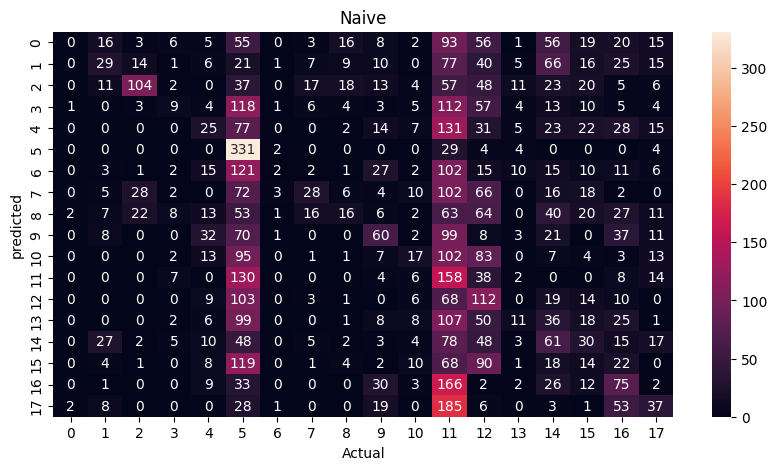

In [63]:
#plotting
plt.figure(figsize=(10,5))
sns.heatmap(cm1,annot=True,fmt="d")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title('Naive')

In [64]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       374
           1       0.24      0.08      0.13       342
           2       0.58      0.28      0.38       376
           3       0.20      0.03      0.04       359
           4       0.16      0.07      0.09       380
           5       0.21      0.89      0.33       374
           6       0.17      0.01      0.01       345
           7       0.31      0.08      0.12       362
           8       0.20      0.04      0.07       371
          10       0.28      0.17      0.21       352
          11       0.19      0.05      0.08       348
          12       0.09      0.43      0.15       367
          13       0.14      0.32      0.19       345
          14       0.18      0.03      0.05       372
          15       0.14      0.17      0.15       358
          17       0.06      0.04      0.05       362
          18       0.20      0.21      0.20       361
          19       0.22    

In [65]:
print(precision_score(y_test,y_pred2,average='macro'))

0.19764498702364888


In [66]:
print(accuracy_score(y_test,y_pred2))

0.16777075951317208


In [67]:
print(f1_score(y_test,y_pred2,average='macro'))

0.13363835983812622


In [68]:
print(recall_score(y_test,y_pred2,average='macro'))

0.16623734558965675


# Decision Tree Classifier

In [69]:
#libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [71]:
kf=KFold(n_splits=5,random_state=42,shuffle=True)

In [72]:
dt=DecisionTreeClassifier(random_state=42).fit(X_train,y_train)

In [73]:
param_grid={'min_samples_split':[3,5,7,9,10,40,80,100],
           'min_samples_leaf':[1,3,4,5,6,7,8,10,40,80,100],
           'max_depth':[3,4,5,6,7,8,9,10],
           'max_features':[2,3,4,5,6,7]}

In [74]:
#gridsearch k fold
gridcv=GridSearchCV(dt,param_grid,cv=kf)

In [75]:
gridcv.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': [2, 3, 4, 5, 6, 7],
                         'min_samples_leaf': [1, 3, 4, 5, 6, 7, 8, 10, 40, 80,
                                              100],
                         'min_samples_split': [3, 5, 7, 9, 10, 40, 80, 100]})

In [76]:
gridcv.best_score_

0.43129745790689994

In [77]:
gridcv.best_params_

{'max_depth': 10,
 'max_features': 6,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [78]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_split=5,
                       random_state=42)

In [79]:
#model building
dt_model=DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_split=5,
                       random_state=42).fit(X_train,y_train)
y_pred4=dt_model.predict(X_test)

In [80]:
print('Score Training: ',dt_model.score(X_train,y_train))
print('Score Test: ',dt_model.score(X_test,y_test))

Score Training:  0.5515351601188511
Score Test:  0.4805114774302881


In [81]:
cm4=confusion_matrix(y_test,y_pred4)
print(cm4)

[[ 67  33  11  20  11  12  21  21  39   6  18   9  10  26  23  31   7   9]
 [ 35 113  21   8  12   6   6  13  23   8  13   5  16  21  18  13   9   2]
 [  3  19 233   6   6   8   0  24  14   1  21   4   4  27   0   0   2   4]
 [ 21   7  12  46  17  29  12  19  20   4  49  11  27  33  12  25   8   7]
 [ 15  10   2  22 114  12   9  12  12  14  10  16  16  49  11  28   9  19]
 [  0   4   4   5   1 296   8   3   0   4   8  18  11  11   0   1   0   0]
 [ 17  12   4  30  31  30  50   5   9  17  16  25  13  44   5  10  13  14]
 [  8  13  22  10   3  15   1 208  13   1  17  12  17   3   3   5   4   7]
 [ 24  19   1  25   7   4   3  17 156   8  30   7   7  40  11   8   4   0]
 [  1   3   0  16  21   9   1   1   0 236   4   2  11  16  10   3  14   4]
 [ 16   9   5  15   7  13   5  34  16   3 153   8  12  21  11  12   2   6]
 [  0   9   1   6   6   1   5   4   3  10  11 263   5  13   7   0  14   9]
 [  5  10   7  19   2  10   0  10  11   1  24   5 197  25   2  13   4   0]
 [ 13  22   2  27   7  11

Text(0.5, 1.0, 'Decision Tree')

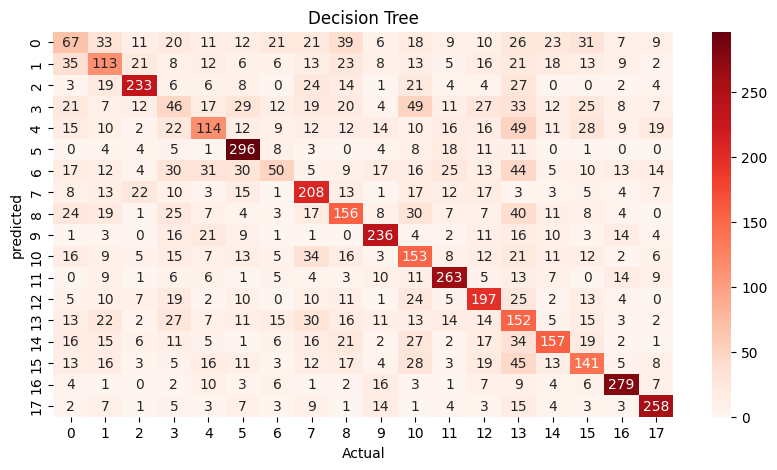

In [82]:
#plotting
plt.figure(figsize=(10,5))
sns.heatmap(cm4,annot=True,fmt="d",cmap="Reds")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title('Decision Tree')

In [83]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.26      0.18      0.21       374
           1       0.35      0.33      0.34       342
           2       0.70      0.62      0.66       376
           3       0.17      0.13      0.14       359
           4       0.41      0.30      0.35       380
           5       0.62      0.79      0.69       374
           6       0.32      0.14      0.20       345
           7       0.47      0.57      0.52       362
           8       0.42      0.42      0.42       371
          10       0.66      0.67      0.66       352
          11       0.34      0.44      0.39       348
          12       0.64      0.72      0.68       367
          13       0.49      0.57      0.52       345
          14       0.26      0.41      0.32       372
          15       0.53      0.44      0.48       358
          17       0.42      0.39      0.41       362
          18       0.73      0.77      0.75       361
          19       0.72    

In [84]:
print(accuracy_score(y_test,y_pred4))

0.4805114774302881


In [85]:
print(f1_score(y_test,y_pred4,average='macro'))

0.47079349948572385


In [86]:
print(precision_score(y_test,y_pred4,average='macro'))

0.47267720615967757


In [87]:
print(recall_score(y_test,y_pred4,average='macro'))

0.48045822956436257


[Text(0.4275215465284474, 0.9545454545454546, 'budget <= -0.589\ngini = 0.944\nsamples = 15145\nvalue = [828, 860, 826, 843, 822, 828, 857, 840, 831, 850\n854, 835, 857, 830, 844, 840, 841, 859]\nclass = y[1]'),
 Text(0.12979899951783994, 0.8636363636363636, 'Prodcompanies <= -2.044\ngini = 0.925\nsamples = 4829\nvalue = [171, 111, 95, 331, 239, 741, 373, 164, 127, 208\n406, 269, 263, 260, 169, 333, 79, 490]\nclass = y[5]'),
 Text(0.023188886210221794, 0.7727272727272727, 'popularity <= -0.602\ngini = 0.692\nsamples = 735\nvalue = [20, 43, 24, 22, 33, 0, 32, 10, 4, 25, 11, 67\n22, 2, 0, 0, 27, 393]\nclass = y[17]'),
 Text(0.010366441658630666, 0.6818181818181818, 'Prodcompanies <= -4.085\ngini = 0.588\nsamples = 108\nvalue = [4, 10, 0, 2, 6, 0, 11, 0, 0, 0, 0, 67, 6, 0\n0, 0, 0, 2]\nclass = y[11]'),
 Text(0.00626808100289296, 0.5909090909090909, 'runtime <= -0.029\ngini = 0.307\nsamples = 76\nvalue = [3, 2, 0, 2, 3, 0, 3, 0, 0, 0, 0, 63, 0, 0\n0, 0, 0, 0]\nclass = y[11]'),
 Text(0.0038

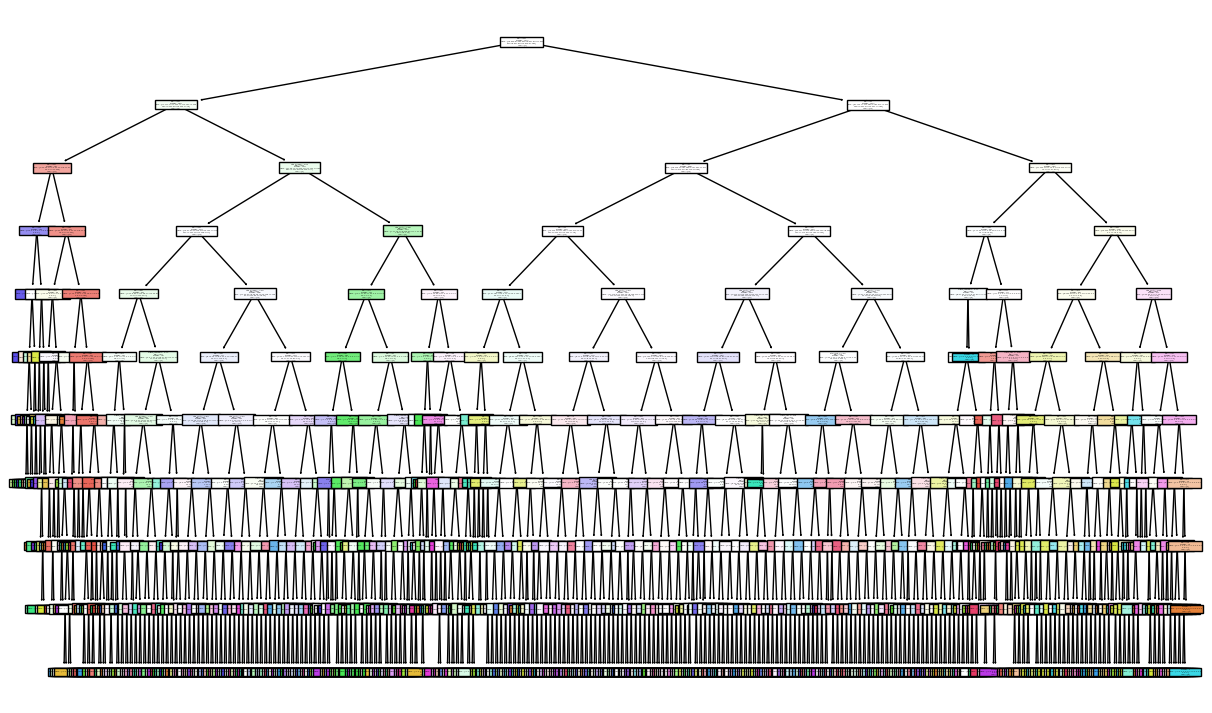

In [88]:
#plotting
plt.figure(figsize=(15,9))
tree.plot_tree(dt_model,filled=True,feature_names=gendf.columns,class_names=True)

# KNN Classifier

In [89]:
#library
from sklearn.neighbors import KNeighborsClassifier

In [90]:
scaled_x.shape

(4734, 14)

In [92]:
#score
score1=[]
for i in range(60,75):
    score=cross_val_score(KNeighborsClassifier(i),scaled_x,y,cv=kf,scoring='accuracy')
    print(f'{i} : ',np.mean(score))
    score1.append(np.mean(score))

60 :  0.34347321350833054
61 :  0.3460077556587956
62 :  0.34347254376232056
63 :  0.3464303653910982
64 :  0.34664222837892444
65 :  0.34748655484884944
66 :  0.34643036539109817
67 :  0.34537484567935683
68 :  0.34579700891431936
69 :  0.3436844067501468
70 :  0.34326224351518425
71 :  0.3449520126983844
72 :  0.3449520126983844
73 :  0.3460077556587956
74 :  0.3436848532474868


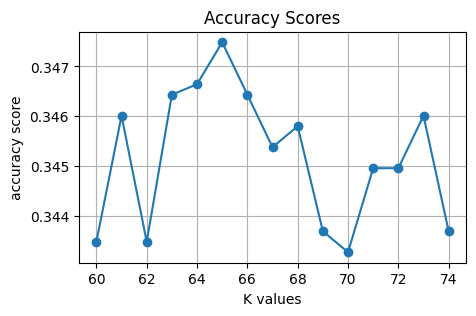

In [93]:
#score plotting
plt.figure(figsize=(5,3))
plt.plot(range(60,75),score1,marker='o')
plt.xlabel('K values')
plt.ylabel('accuracy score')
plt.title("Accuracy Scores")
plt.grid()
plt.show()

In [94]:
#biuld model
k=65
k_model = KNeighborsClassifier(k).fit(X_train,y_train)
y_predk = k_model.predict(X_test)

In [95]:
print("Training score:", k_model.score(X_train,y_train))

Training score: 0.5441399801914824


In [96]:
print("Testing score:", k_model.score(X_test,y_test))

Testing score: 0.5190263441688492


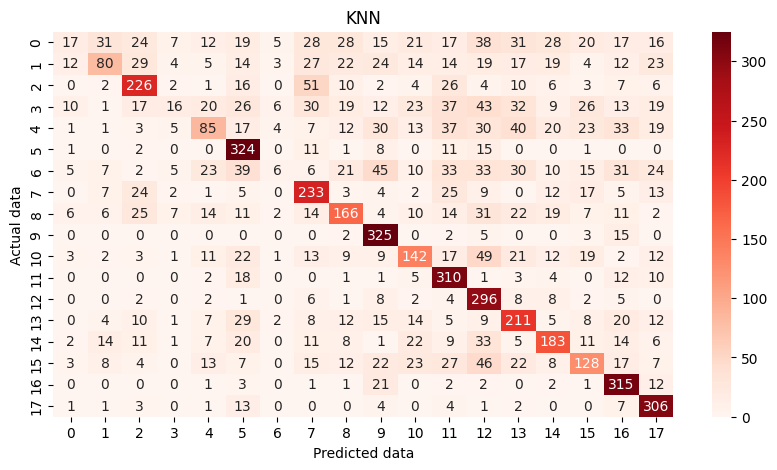

In [97]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_predk),annot=True,fmt='g',cmap='Reds')
plt.ylabel('Actual data')
plt.xlabel('Predicted data')
plt.title('KNN')
plt.show()

In [98]:
print(classification_report(y_test,y_predk))

              precision    recall  f1-score   support

           0       0.28      0.05      0.08       374
           1       0.49      0.23      0.32       342
           2       0.59      0.60      0.59       376
           3       0.31      0.04      0.08       359
           4       0.41      0.22      0.29       380
           5       0.55      0.87      0.68       374
           6       0.21      0.02      0.03       345
           7       0.51      0.64      0.57       362
           8       0.51      0.45      0.47       371
          10       0.59      0.92      0.72       352
          11       0.47      0.41      0.43       348
          12       0.52      0.84      0.65       367
          13       0.45      0.86      0.59       345
          14       0.46      0.57      0.51       372
          15       0.53      0.51      0.52       358
          17       0.44      0.35      0.39       362
          18       0.59      0.87      0.70       361
          19       0.63    

In [99]:
print(accuracy_score(y_test,y_predk))

0.5190263441688492


In [100]:
print(precision_score(y_test,y_predk,average='macro'))

0.4741605237700749


In [101]:
print(f1_score(y_test,y_predk,average='macro'))

0.4643958256759481


In [102]:
print(recall_score(y_test,y_predk,average='macro'))

0.5196749102020627


# Random Forest

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
rf=RandomForestClassifier()

In [105]:
param_grid={"n_estimators":[10,20,40,50,70,100], #base learner
            "min_samples_split":[10,20,30], #sample size
            "min_samples_leaf":[20,40,100],
            "max_depth":[3,4,5,6,7,8,9,10]
}

In [106]:
grid_cv2 = GridSearchCV(rf,param_grid,cv=kf,scoring="accuracy")

In [107]:
grid_cv2.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [20, 40, 100],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 40, 50, 70, 100]},
             scoring='accuracy')

In [108]:
grid_cv2.best_score_

0.5615054473423571

In [109]:
grid_cv2.best_params_

{'max_depth': 10,
 'min_samples_leaf': 20,
 'min_samples_split': 10,
 'n_estimators': 70}

In [110]:
grid_cv2.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,
                       n_estimators=70)

In [111]:
rm_model=RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,n_estimators=70).fit(X_train,y_train)
y_pred3=rm_model.predict(X_test)

In [112]:
print("Train Random:" ,rm_model.score(X_train,y_train))

Train Random: 0.6596236381644107


In [113]:
print("Test Random:" ,rm_model.score(X_test,y_test))

Test Random: 0.5824988445539978


In [114]:
cm3=confusion_matrix(y_test,y_pred3)
print(cm3)

[[ 62  39  13  14  11  16  13   7  28  15  22  11  18   9  39  21  23  13]
 [ 18 107  31   6   4  11   4  24  15  11  15  14  14   9  18   6  18  17]
 [  1   3 287   8   0   4   0  23   0   4  15  18   3   3   1   2   2   2]
 [ 19   4  20  52  12  33  25  13  19   1  50  19  29  13   5  18  13  14]
 [ 11   7   1   5 153  21  12   6   6  12  26  22  17   6  11  14  23  27]
 [  0   0   0   2   0 354   0   5   0   0   9   0   1   2   0   0   0   1]
 [ 10  11   2  28  22  45  48   3   4  29   5  24  12  14   8  18  38  24]
 [  0   0  25   0   3  18   0 265   5   0   5  10   7   0   1   8   3  12]
 [ 16  11  28   9  10   6   2  15 182   1  15  21  19   4  11   0  12   9]
 [  0   0   0   0   1   5   0   0   0 318   3   2   9   1   0   3   3   7]
 [  2   2   1  13   7  21   2   8   9   3 208   6  26   1  14  14   0  11]
 [  1   0   0   2   2   9   0   5   0  13   8 301   2   0   5   0   8  11]
 [  3   5   6   0   1   6   4  13   2   6   6   4 270   1   8   2   7   1]
 [ 12   5   1   9  11  26

Text(0.5, 1.0, 'Random')

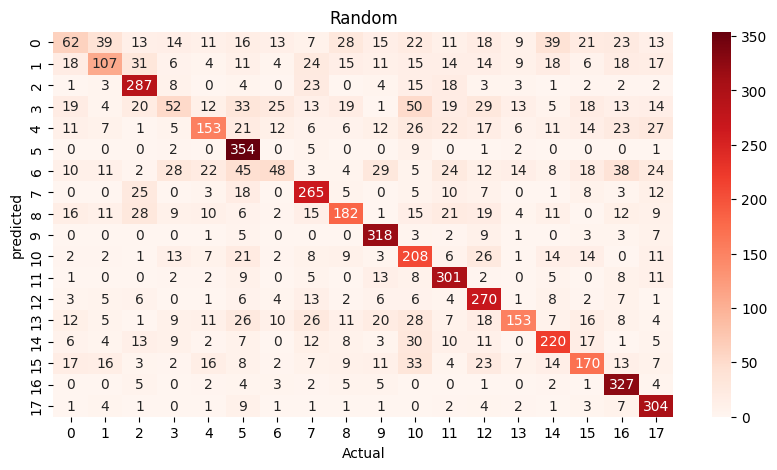

In [115]:
plt.figure(figsize=(10,5))
sns.heatmap(cm3,annot=True,cmap='Reds',fmt="d")
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title('Random')

In [116]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.35      0.17      0.22       374
           1       0.49      0.31      0.38       342
           2       0.66      0.76      0.71       376
           3       0.33      0.14      0.20       359
           4       0.59      0.40      0.48       380
           5       0.59      0.95      0.72       374
           6       0.38      0.14      0.20       345
           7       0.61      0.73      0.66       362
           8       0.60      0.49      0.54       371
          10       0.70      0.90      0.79       352
          11       0.44      0.60      0.50       348
          12       0.63      0.82      0.71       367
          13       0.56      0.78      0.65       345
          14       0.68      0.41      0.51       372
          15       0.60      0.61      0.61       358
          17       0.54      0.47      0.50       362
          18       0.65      0.91      0.75       361
          19       0.64    

In [117]:
print(accuracy_score(y_test,y_pred3))

0.5824988445539978


In [118]:
print(precision_score(y_test,y_pred3,average='macro'))

0.5574110823384436


In [119]:
print(f1_score(y_test,y_pred3,average='macro'))

0.5505472362316008


In [120]:
print(recall_score(y_test,y_pred3,average='macro'))

0.5827281987734881


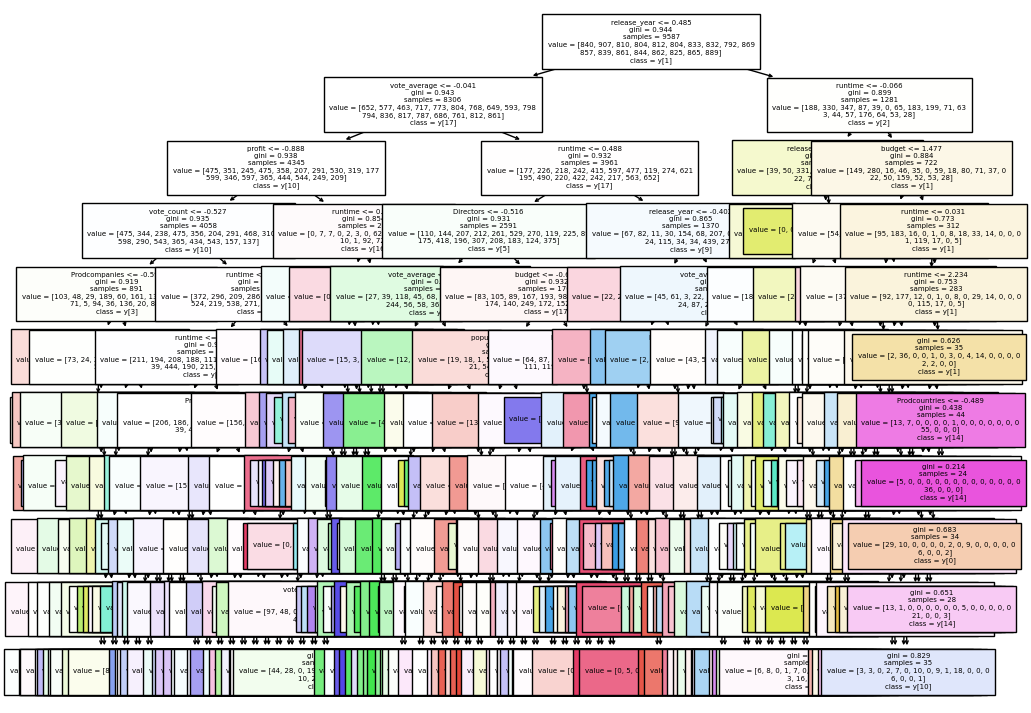

In [121]:
#random forest 
from sklearn import tree
plt.figure(figsize=(11,9))
tree.plot_tree(rm_model.estimators_[1],feature_names=gendf.columns,class_names=True,filled=True,fontsize=5)
plt.show()

# Stacking Classifier

In [122]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [124]:
#stacking model
level1=[]
level1.append(('lr',LogisticRegression()))
level1.append(('KNN',KNeighborsClassifier()))
level1.append(('ny',GaussianNB()))
level1.append(('SVM',SVC()))
level1.append(('DT',DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_split=5,
                       random_state=42)))
level1.append(('RF',RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,n_estimators=70)))
level2=LogisticRegression()
stac_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf)

In [125]:
level1

[('lr', LogisticRegression()),
 ('KNN', KNeighborsClassifier()),
 ('ny', GaussianNB()),
 ('SVM', SVC()),
 ('DT',
  DecisionTreeClassifier(max_depth=10, max_features=6, min_samples_split=5,
                         random_state=42)),
 ('RF',
  RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=10,
                         n_estimators=70))]

In [126]:
s_model=stac_model.fit(X_train,y_train)
y_pred6=s_model.predict(X_test)

In [127]:
print('Score Training: ',s_model.score(X_train,y_train))
print('Score Test: ',s_model.score(X_test,y_test))

Score Training:  0.8572466160448993
Score Test:  0.7935603142813126


In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(confusion_matrix(y_test,y_pred6),annot=True,fmt='g',cmap='Reds')
plt.ylabel('Actual data')
plt.xlabel('Predicted data')
plt.title('Stacking')
plt.show()

In [128]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.54      0.33      0.41       374
           1       0.76      0.72      0.74       342
           2       0.88      0.91      0.90       376
           3       0.41      0.22      0.29       359
           4       0.76      0.79      0.77       380
           5       0.88      0.95      0.91       374
           6       0.37      0.29      0.33       345
           7       0.86      0.94      0.90       362
           8       0.81      0.91      0.86       371
          10       0.91      0.94      0.92       352
          11       0.73      0.83      0.77       348
          12       0.88      0.94      0.91       367
          13       0.85      0.91      0.88       345
          14       0.82      0.92      0.87       372
          15       0.83      0.91      0.86       358
          17       0.78      0.87      0.82       362
          18       0.93      0.98      0.95       361
          19       0.88    

In [129]:
print(precision_score(y_test,y_pred6,average='macro'))

0.7704941879636455


In [130]:
print(f1_score(y_test,y_pred6,average='macro'))

0.7772201617507734


In [131]:
print(accuracy_score(y_test,y_pred6))

0.7935603142813126


In [132]:
print(recall_score(y_test,y_pred6,average='macro'))

0.7926926308407186


In [ ]:
#saving to file

In [ ]:
gendf.to_csv('genre.csv')

**Stacking Classifier best model**